In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

 First, let's only use numeric data:


In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Now, we define the functions that will be used in the lab for making plots at different stages.


In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [6]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">Training and Testing</h2>


In [8]:
y_data = df['price']

Drop price data in dataframe **x_data**:


In [9]:
x_data=df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>. 


In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset. 


In [11]:
# Write your code below and press Shift+Enter to execute 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 81
number of training samples: 120


In [12]:
from sklearn.linear_model import LinearRegression

 We create a Linear Regression object:


In [13]:
lre=LinearRegression()

We fit the model using the feature "horsepower":


In [14]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [15]:
lre.score(x_test[['horsepower']], y_test)

0.7139364665406973

We can see the R^2 is much smaller using the test data compared to the training data.


In [16]:
lre.score(x_train[['horsepower']], y_train)

0.5754067463583004

In [17]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

<h2>Cross-Validation Score</h2>


In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


In [20]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

 We can calculate the average and standard deviation of our estimate:


In [21]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.2911839444756025


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 


In [22]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247589])

In [23]:
# Write your code below and press Shift+Enter to execute 
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [24]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [25]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h2 id="ref2"> Overfitting, Underfitting and Model Selection</h2>

Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [26]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [27]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([38237.3225152 ,  8757.67570728, 16832.43125207, 16093.28264058,
       14757.89820098])

Prediction using test data: 


In [28]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 5114.7345989 , 10941.98915173, 20956.19697977, 20968.65125706,
       19966.75504097])

Let's perform some model evaluation using our training and testing data separately. 


Let's examine the distribution of the predicted values of the training data.


C:\Users\juan esteban\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\juan esteban\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


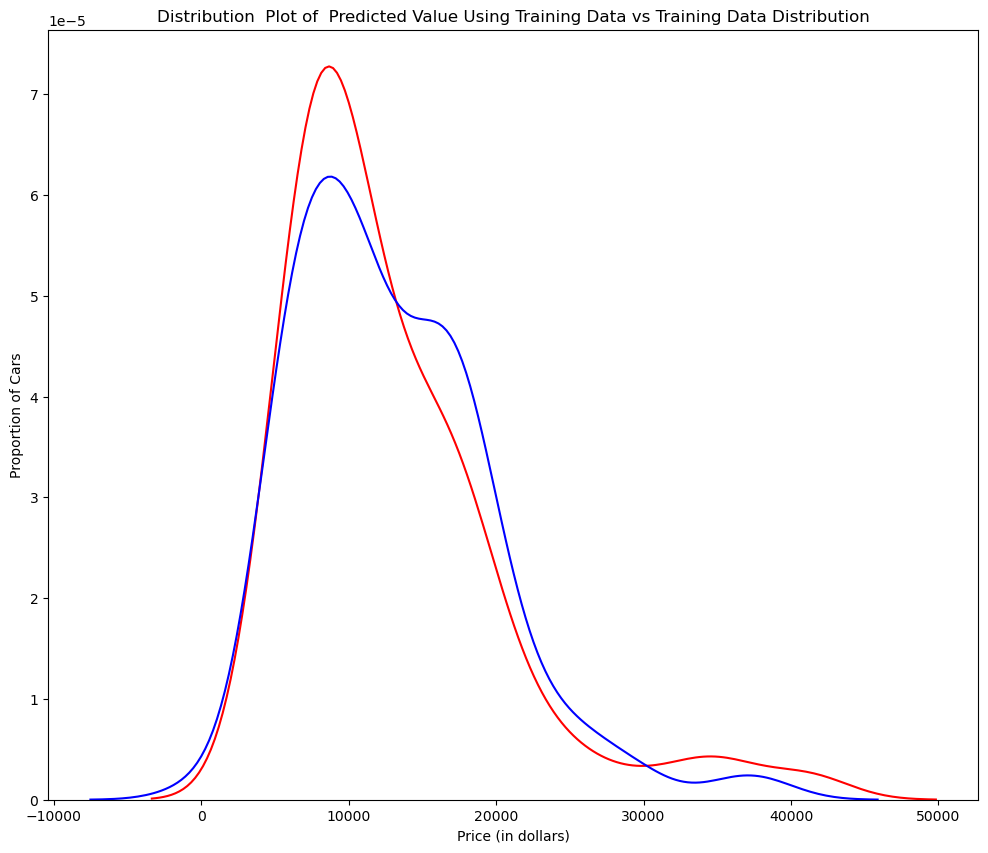

In [29]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data. 


C:\Users\juan esteban\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\juan esteban\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


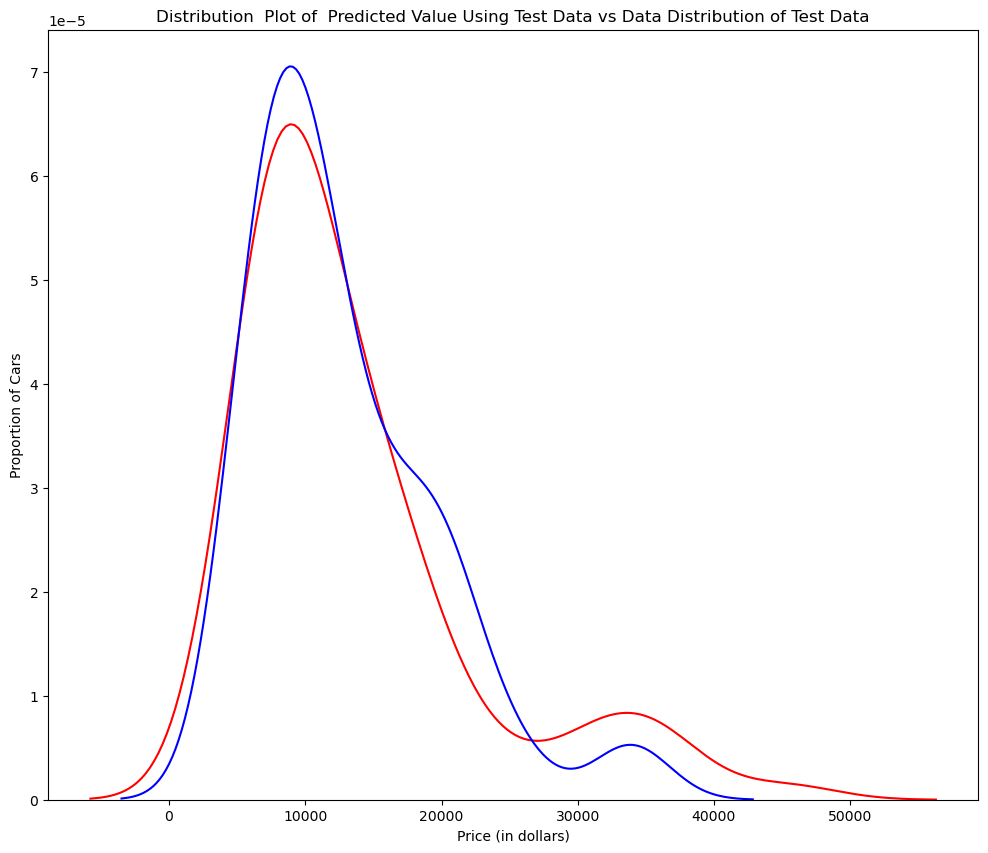

In [30]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data. 


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [31]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>

Let's use 55 percent of the data for training and the rest for testing:


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>. 


In [33]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.


In [34]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [35]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.73877623,  7308.06173582, 12213.81078747, 18893.1290908 ,
       19995.81407813])

Let's take the first five predicted values and compare it to the actual targets. 


In [36]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.73877623  7308.06173582 12213.81078747 18893.1290908 ]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


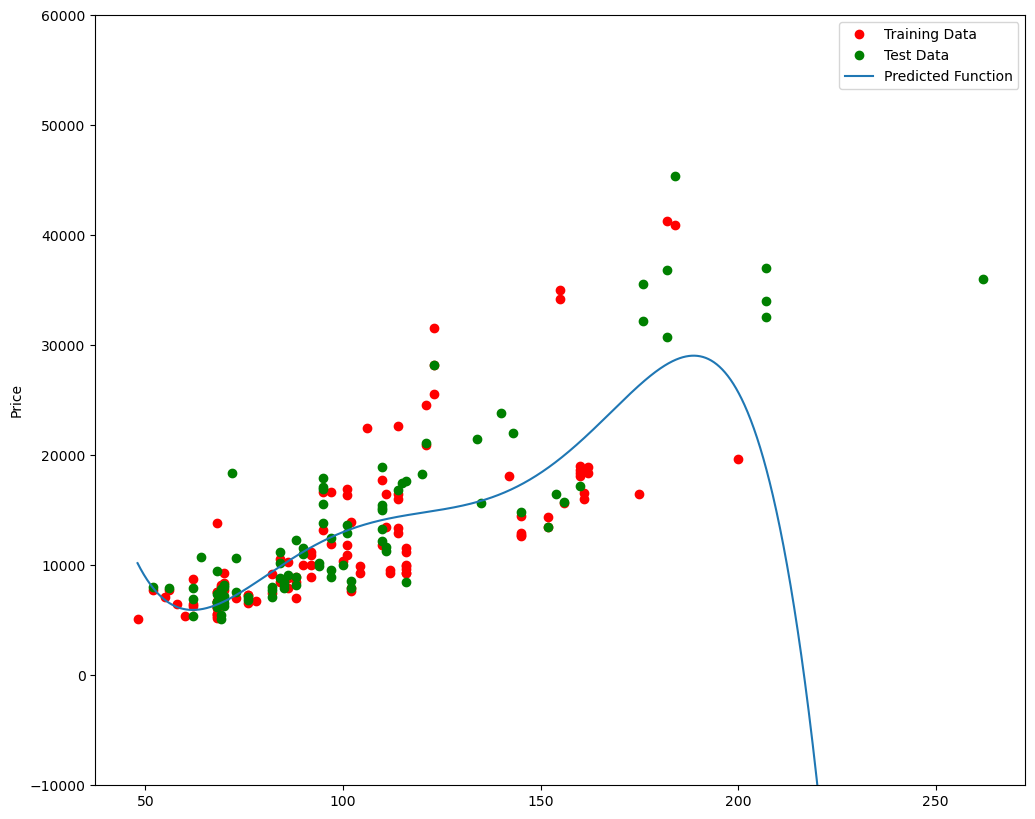

In [38]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 


 R^2 of the training data:


In [39]:
poly.score(x_train_pr, y_train)

0.5567716902028981

 R^2 of the test data:


In [40]:
poly.score(x_test_pr, y_test)

-29.871621329672777

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

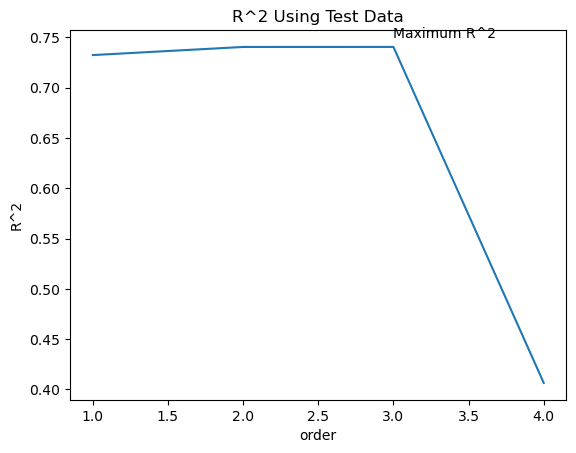

In [41]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


In [42]:
pr1 = PolynomialFeatures(degree=2)


In [43]:
x_train_pr1 = pr.fit_transform(x_train[['horsepower','curb-weight', 'engine-size','highway-mpg']])
x_test_pr1 = pr.fit_transform(x_test[['horsepower','curb-weight', 'engine-size','highway-mpg']])


<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


In [44]:
x_train1.shape

(120, 20)

In [45]:
# Write your code below and press Shift+Enter to execute 
poly1 = LinearRegression().fit(x_train_pr1,y_train)


C:\Users\juan esteban\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\juan esteban\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


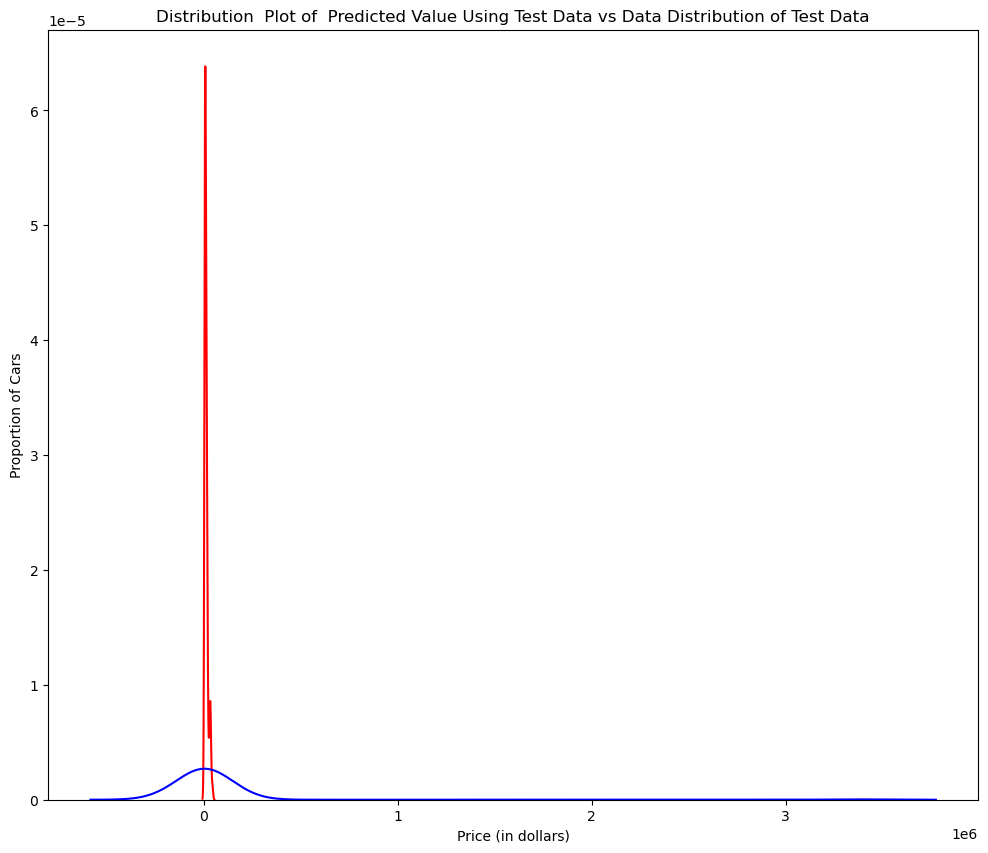

In [46]:
# Write your code below and press Shift+Enter to execute 
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

<h2 id="ref3">Ridge Regression</h2> 


 Let's perform a degree two polynomial transformation on our data. 


In [47]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [48]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 1 


In [49]:
RigeModel=Ridge(alpha=1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [50]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

 Similarly, you can obtain a prediction: 


In [51]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first four predicted samples to our test set: 


In [52]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [53]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:05<00:00, 180.18it/s, Test Score=0.564, Train Score=0.859]


We can plot out the value of R^2 for different alphas: 


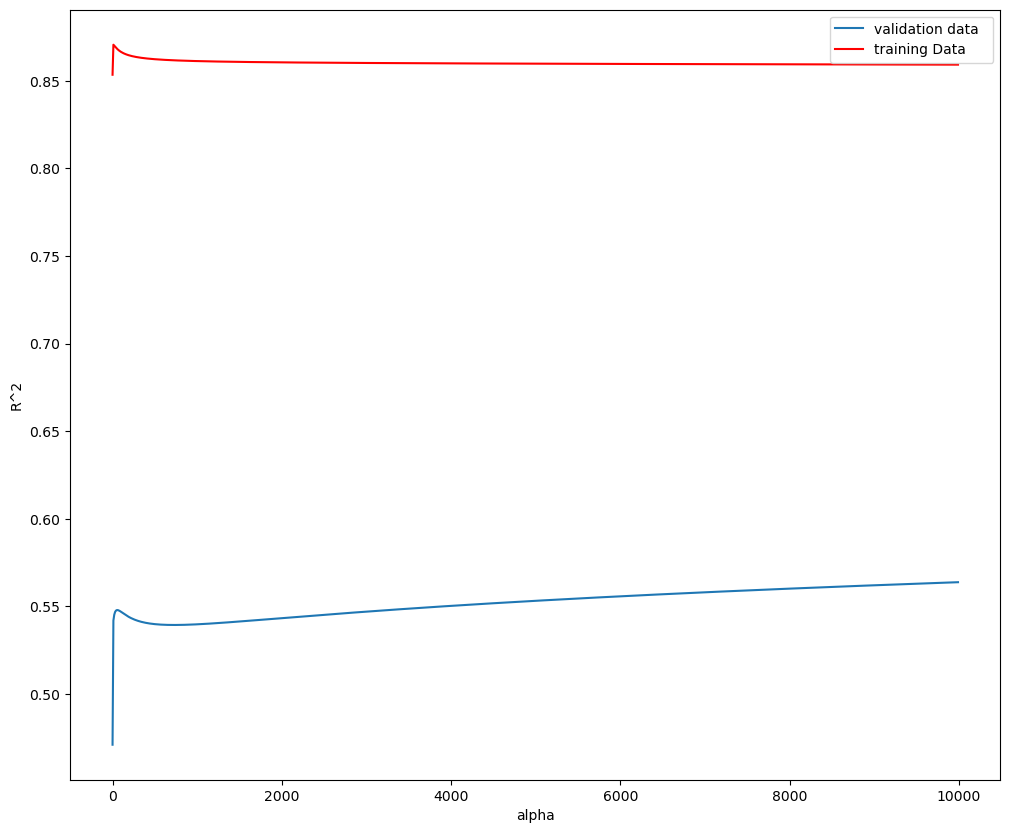

In [54]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


In [55]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440207269

<h2 id="ref4"> Grid Search</h2>


In [56]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [57]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:


In [58]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [59]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In order to avoid a deprecation warning due to the iid parameter, we set the value of iid to "None".

Fit the model:


In [60]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [61]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

 We now test our model on the test data:


In [62]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [63]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)

In [68]:

x_new = np.array([[150, 2500, 180, 30]])  
y_pred_new = best_ridge_model.predict(x_new)

print("model prediction:", y_pred_new)


model prediction: [19261.14698843]
